In [2]:
import json
from pathlib import Path
from sqlitedict import SqliteDict
import pandas as pd
from tqdm import tqdm

In [2]:
path = Path("../data/faiss/mahti2/merge_log.jsonl")

with path.open() as f:
    lines = []
    for line in f:
        lines.append(json.loads(line))

In [3]:
path = Path("../data/faiss/mahti2/merge_results.jsonl")

with path.open() as f:
    lines = []
    for line in tqdm(f):
        lines.append(json.loads(line)["descriptor"])

362521it [02:34, 2352.90it/s]


In [6]:
singletons = 0
for line in lines:
    if "|M|" not in line:
        singletons += 1

print(singletons)
print(singletons/len(lines))

295341
0.8146865974660779


In [3]:
iter20 = [line for line in lines if line["iteration"] == 20]

In [4]:
iter20[100]

{'iteration': 20,
 'merged_ids': [8423, 91352],
 'merged_descriptors': ['affordable: the document emphasizes the importance of affordability in dumpster rental services, with companies being expected to provide cost-effective solutions. this descriptor is significant as it acknowledges the budget constraints faced by customers and the need for companies to offer competitive pricing. affordable services are essential for making dumpster rental accessible to a wider range of customers and promoting sustainability.',
  'customized: the document mentions the importance of customized services, with dumpster rental companies offering tailored solutions to meet the specific needs of their customers. this descriptor is relevant as it highlights the value of flexibility and adaptability in the industry. customized services allow companies to respond to the unique needs of their customers and provide more effective solutions.']}

In [ ]:
string_level_duplicates = []
non_duplicates = []
not_merged = []
total_descriptors = []
for i in range(0,51):
    all_the_same = 0
    not_all_same = 0
    unmerged = 0
    with SqliteDict(f"../data/faiss/mahti2/checkpoints/descriptors_iter{i}.sqlite") as descriptor_db:
        num_descriptors = len(descriptor_db)
        for idx in descriptor_db:
            if "|M|" in descriptor_db[idx]:
                descriptors = descriptor_db[idx].split("|M|")
                descriptors = [desc.strip() for desc in descriptors]
                descriptors = [desc.split(":") for desc in descriptors]
                descriptors = [desc[0] for desc in descriptors]
                if len(set(descriptors)) == 1:
                    all_the_same += 1
                else:
                    not_all_same += 1
            else:
                unmerged += 1
        

    print(f"For iteration {i}:")
    print(f"Total descriptors: {num_descriptors}")
    print(f"All the same: {all_the_same}")
    print(f"Not all same: {not_all_same}")
    print(f"Unmerged: {unmerged}")
    string_level_duplicates.append(all_the_same)
    non_duplicates.append(not_all_same)
    not_merged.append(unmerged)
    total_descriptors.append(num_descriptors)

For iteration 0:
Total descriptors: 998277
All the same: 0
Not all same: 0
Unmerged: 998277
For iteration 1:
Total descriptors: 847763
All the same: 93437
Not all same: 57077
Unmerged: 697249
For iteration 2:
Total descriptors: 776698
All the same: 83925
Not all same: 64522
Unmerged: 628251
For iteration 3:
Total descriptors: 732693
All the same: 74795
Not all same: 65715
Unmerged: 592183
For iteration 4:
Total descriptors: 701010
All the same: 67889
Not all same: 65429
Unmerged: 567692
For iteration 5:
Total descriptors: 676080
All the same: 62523
Not all same: 64787
Unmerged: 548770


In [10]:
not_merged = []
for i in range(1,21):
    with SqliteDict(f"../data/faiss/mahti2/checkpoints/descriptors_iter{i}.sqlite") as descriptor_db:
        num_descriptors = len(descriptor_db)
        not_merged.append(num_descriptors-string_level_duplicates[i-1]-non_duplicates[i-1])

<Axes: >

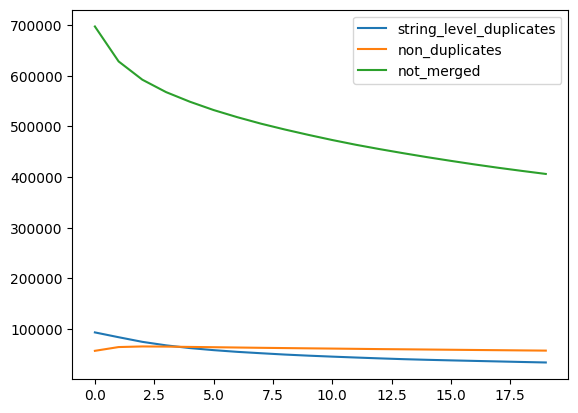

In [18]:
df = pd.DataFrame(
    {"string_level_duplicates": string_level_duplicates,
     "non_duplicates": non_duplicates,
     "not_merged": not_merged
    }
)

df.plot.line()

In [6]:
len(descriptor_db)

497773

In [19]:
num_merges = []
with SqliteDict(f"../data/faiss/mahti2/checkpoints/descriptors_iter50.sqlite") as descriptor_db:
    for idx in descriptor_db:
        if "|M|" in descriptor_db[idx]:
            descs = descriptor_db[idx].split("|M|")
            num_merges.append(len(descs))

print(len(num_merges))
print(max(num_merges))
print(sum(num_merges)/len(num_merges))

67180
3956
10.46347127121167


In [8]:
for i in descriptor_db:
    if "|M|" in descriptor_db[i]:
        print(descriptor_db[i])
        break

020 8884 1166: the document provides a phone number for greenfields solicitors, making it 020 8884 1166. |M| greenfields solicitors: the text provides contact information for greenfields solicitors, making it greenfields solicitors.


In [3]:
path = Path("../data/faiss/mahti2/merge_results.jsonl")

with path.open() as f:
    lines = []
    for line in f:
        lines.append(json.loads(line))

KeyboardInterrupt: 

In [ ]:
merged = 0
not_merged = 0
for line in lines:
    if "|M|" in line["descriptor"]:
        merged += 1
    else:
        not_merged += 1

print(merged)
print(not_merged)

In [5]:
path = Path("../data/faiss/mahti2/descriptors.txt")

with path.open() as f:
    lines = []
    for line in f:
        lines.append(line)

In [6]:
lines[0:10]

['020 8884 1166: the document provides a phone number for greenfields solicitors, making it 020 8884 1166. |M| greenfields solicitors: the text provides contact information for greenfields solicitors, making it greenfields solicitors.\n',
 '1,668 to 2,897 square feet: the document describes the 1,668 to 2,897 square feet, emphasizing the spaciousness and comfort of the homes. |M| 1,879 to 3,209 square feet: the document mentions the 1,879 to 3,209 square feet, emphasizing the spaciousness and comfort of the homes.\n',
 '10,000 ukrainians: the document describes 10,000 ukrainians, specifically the number of ukrainians living in westchester county. |M| westchester county: the document describes westchester county, specifically the location of ukrainians living in the united states.\n',
 "10-year anniversary: the document mentions the 10-year anniversary of the super bowl, which provides context for the discussion. the anniversary serves as a catalyst for the author's reflection on the pa